## Identifying Cues on Internal States from the Movements of Natural Social Interactions

*This notebook complements and supports the paper "What Can You See? Identifying Cues on Internal States from the Movements of Natural Social Interactions" by Bartlett et al.*


## Analysis setup

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib
#%matplotlib notebook
#%matplotlib qt5
%matplotlib inline
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0) # bigger figures

import seaborn as sns
sns.set() # better looking figs

# hide warnings for clarity
import warnings
warnings.filterwarnings('ignore')

/home/s-lemaignan/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# our own set of small helper functions for plotting, etc
from utils import plot_embedding, plot_compare_embeddings, show_heatmap, plot_confusion_matrix

Load dataset, rename and re-order columns where necessary. *Note that the participants who failed the attention check were excluded, and are not present in the dataset.*

In [3]:
data = pd.read_csv("../fulldata.csv")
data["clipId"] = data["clipName"].apply(lambda x: x[-8:-6])

# re-order columns + keep only useful ones
data = data[['pptID','fileName', 'condition', 'age', 'gender', 'nationality', 'firstLang', 'trial', 'clipId', 'freetext',
 'q01', 'q02', 'q03', 'q04', 'q05', 'q06', 'q07', 'q08', 'q09', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17',
 'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29', 'q30']]

Rename `qXX` columns with the names of the actual constructs tested in the questionnaire.

Notes:
- `condition=1` is the 'Movement-only' (ie, skeletons) condition, `condition=2` is the 'Full-scene' condition
- each participant `pptID` watched 4 different clips, hence 4 rows per participant

In [4]:
constructs=["Sad", "Happy", "Angry", "Excited", "Calm", "Friendly", "Aggressive", "Engaged", "Distracted", "Bored", "Frustrated","Dominant","Submissive"]

index = data.columns.tolist()
index = index[0:10] + ["Competing", "Cooperating", "PlaySeparate", "PlayTogether"] + [c for c1 in constructs for c in ['left' + c1, 'right' + c1]]
data.columns=index
data

,pptID,fileName,condition,age,gender,nationality,firstLang,trial,clipId,freetext,...,leftDistracted,rightDistracted,leftBored,rightBored,leftFrustrated,rightFrustrated,leftDominant,rightDominant,leftSubmissive,rightSubmissive
0,186,10kin7dm75u231_data.csv,2,30,Female,Indian,Tamil,1,04,PLAY TOGETHER THE CARD GAME TO ENJOY THEM . IN...,...,2,2,1,2,1,2,2,2,2,2
1,186,10kin7dm75u231_data.csv,2,30,Female,Indian,Tamil,2,09,PLAYING TOGETHER FOR TWO CHILDREN . TO PLAY CA...,...,3,4,3,3,3,4,3,4,3,3
2,186,10kin7dm75u231_data.csv,2,30,Female,Indian,Tamil,3,16,PLAYING TOGETHER THE GAME. PLAY TO LEARNING TH...,...,3,4,3,3,3,3,3,4,3,3
3,186,10kin7dm75u231_data.csv,2,30,Female,Indian,Tamil,4,02,PLAYING TO LEARNING TOGETHER. TO PLAY INTEREST...,...,3,4,3,3,2,2,3,3,3,3
4,94,10kinos8b34va6_data.csv,1,23,Male,American,English,1,15,I notice that they slow down towards the end m...,...,1,1,2,1,1,2,2,2,2,2
5,94,10kinos8b34va6_data.csv,1,23,Male,American,English,2,02,The child on the right seems to be taking over...,...,1,0,1,1,1,3,4,1,3,0
6,94,10kinos8b34va6_data.csv,1,23,Male,American,English,3,08,"Both seem pretty calm, but the child on the le...",...,4,1,4,1,2,1,1,2,3,2
7,94,10kinos8b34va6_data.csv,1,23,Male,American,English,4,11,These children seem to be working together pre...,...,1,1,1,1,1,1,2,2,1,1
8,155,10kinqv5zq7rl5_data.csv,2,28,Male,American,English,1,12,They got along quite well and helped each othe...,...,0,4,3,2,2,4,2,2,4,2
9,155,10kinqv5zq7rl5_data.csv,2,28,Male,American,English,2,07,They played separately largely. They were fine...,...,3,0,4,1,3,4,3,3,0,2


## Pre-processing

For each left/right pair of constructs, compute the absolute difference and the sum (shifted to [-2, +2] interval).

This provides insight on the imbalance of the given construct between the children (difference), and the overall 'strenght' of the construct in the clip (sum).

In [5]:
for c in constructs:
    data["diff"+c] = abs(data["left" + c] - data["right" + c])
    data["sum"+c] = data["left" + c] + data["right" + c] - 4
   

Create 2 lists of columns names, one for diff/sum constructs (the main one), one for left/right constructs.

In [6]:
columnsLeftRight=[]
columnsDiffSum=[]

for c in constructs:
    columnsLeftRight.append("left" + c)
    columnsLeftRight.append("right" + c)
    
    columnsDiffSum.append("diff" + c)
    columnsDiffSum.append("sum" + c)


# by default, work with differences & sum for each constructs
selectedColumns=columnsDiffSum

# work with differences & sum and the four questions about group dynamics
allQuestionsDiffSum = ["Competing", "Cooperating", "PlaySeparate", "PlayTogether"] + columnsDiffSum

# work with left/right ratings and the four questions about group dynamics i.e. raw ratings
allQuestionsLeftRight = ["Competing", "Cooperating", "PlaySeparate", "PlayTogether"] + columnsLeftRight

Define several useful 'partial' views of the data.

In [7]:
#FULL-SCENE DATA

fullscene_df=data[data["condition"]==2] # dataframe showing full scene data only

# the responses to the 26 left/right Likert-scale questions
fullscene_ratings_df=fullscene_df[selectedColumns].astype(float)
fullscene=fullscene_ratings_df.values # the underlying numpy array, needed for clustering

# clip names
fullscene_labels=fullscene_df["clipId"].values

# mean ratings per clip
fullscene_means=fullscene_df.groupby(["clipId"]).mean()[selectedColumns]

In [8]:
#MOVEMENT-ALONE DATA

move_df=data[data["condition"]==1] # dataframe showing movement alone data only

# the responses to the 26 left/right Likert-scale questions
move_ratings_df=move_df[selectedColumns].astype(float)
move=move_ratings_df.values # the underlying numpy array, needed for clustering

# clip names
move_labels=move_df["clipId"].values

# mean ratings per clip
move_means=move_df.groupby(["clipId"]).mean()[selectedColumns]

# Section 3.1: Inter-Rater Agreement

Calculate Kirppendorff's alpha to look at how much participants in each condition agreed on their ratings for each clip (lighter color means higher agreement).

In [9]:
import krippendorff

krip={}

for clipName, group in fullscene_df[["clipId"] + allQuestionsLeftRight].groupby(["clipId"]): # working with all raw ratings
    krip[clipName]=(krippendorff.alpha(group.values[:,1:].astype(int),level_of_measurement='interval'), group.shape[0])

for clipName, group in move_df[["clipId"] + allQuestionsLeftRight].groupby("clipId"):
    krip[clipName]=krip[clipName] + (krippendorff.alpha(group.values[:,1:].astype(int),level_of_measurement='interval'), group.shape[0])

for clipName, group in move_df[["clipId"] + allQuestionsLeftRight].groupby("clipId"):
    ratings = group.values[:,1:].astype(int)
    ratings = np.random.randint(0,5,ratings.shape)
    krip[clipName]=krip[clipName] + (krippendorff.alpha(ratings,level_of_measurement='interval'), group.shape[0])

    
krippendorff_df=pd.DataFrame.from_dict(krip,orient="index", columns=["Fullscene alpha", "N", "Movement-Alone alpha", "N","Random ratings alpha", "N"])

show_heatmap(krippendorff_df[["Fullscene alpha", "Movement-Alone alpha", "Random ratings alpha"]].round(3), cmap="summer")

,Fullscene alpha,Movement-Alone alpha,Random ratings alpha
01,0.446,0.186,-0.001
02,0.181,0.27,0.011
03,0.393,0.369,0.008
04,0.444,0.262,0.006
05,0.328,0.283,-0.002
06,0.463,0.359,-0.017
07,0.091,0.236,0.026
08,0.339,0.312,-0.012
09,0.097,0.058,0.02
10,0.396,0.086,0.012


Comparing the agreement scores in the fullscene vs movement-alone videos, using an paired samples T-test. 

Question: did participants in the fullscene condition agree more in their ratings of each clip than participants in the movement-alone condition?

In [10]:
from scipy.stats import ttest_rel
from math import sqrt

fullscene_krip = krippendorff_df["Fullscene alpha"]
move_krip = krippendorff_df["Movement-Alone alpha"]

print('Mean Kripp Alpha Fullscene:', fullscene_krip.mean())
print('Mean Kripp Alpha Movement:', move_krip.mean())

print('Paired Samples T-Test:', ttest_rel(fullscene_krip, move_krip))

cohens_d = (fullscene_krip.mean() - move_krip.mean()) / (sqrt((fullscene_krip.std() ** 2 + move_krip.std() ** 2) / 2))

print("Cohen's d:", cohens_d)

Mean Kripp Alpha Fullscene: 0.32795503407453647
Mean Kripp Alpha Movement: 0.2516871430686377
Paired Samples T-Test: Ttest_relResult(statistic=2.955422785203005, pvalue=0.008124095387554918)
Cohen's d: 0.7763181922755465


Chance level for Krippendorff's alpha, computed by replacing ratings for each clips and each conditions by random values, and averaging the results:

In [11]:
krip_max = 0

for i in range(100):
    krip_chance={}

    for clipName, group in fullscene_df[["clipId"] + allQuestionsLeftRight].groupby(["clipId"]): # working with all raw ratings
        ratings = group.values[:,1:].astype(int)
        ratings = np.random.randint(0,5,ratings.shape)
        krip_chance[clipName]=(krippendorff.alpha(ratings,level_of_measurement='interval'), group.shape[0])

    for clipName, group in move_df[["clipId"] + allQuestionsLeftRight].groupby("clipId"):
        ratings = group.values[:,1:].astype(int)
        ratings = np.random.randint(0,5,ratings.shape)
        krip_chance[clipName]=krip_chance[clipName] + (krippendorff.alpha(ratings,level_of_measurement='interval'), group.shape[0])


    krippendorff_df=pd.DataFrame.from_dict(krip_chance,orient="index", columns=["Fullscene alpha", "N", "Movement-Alone alpha", "N"])
    k = krippendorff_df[["Fullscene alpha", "Movement-Alone alpha"]].values.mean()
    if k > krip_max:
        krip_max = k
krip_max


0.006459372825004345

# Section 3.2: Automatic Labelling of Social Situations

Multi-label classification using k-Nearest Neighbours (k=3). 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer



training_ground_truth = { '01': ['Aggressive'],
                         '02': ['Excited', 'Aggressive', 'Aimless'],
                         '03': ['Excited', 'Fun'],
                         '04': ['Cooperative'],
                         '05': ['Bored', 'Aimless'],
                         '06': ['Cooperative'],
                         '07': ['Dominant'],
                         '08': ['Bored', 'Fun'],
                         '09': ['Cooperative'],
                         '10': ['Cooperative', 'Dominant'],
                         '11': ['Cooperative', 'Dominant'],
                         '12': ['Aggressive', 'Aimless'],
                         '13': ['Excited', 'Aggressive', 'Aimless'],
                         '14': ['Aggressive'],
                         '15': ['Dominant'],
                         '16': ['Cooperative', 'Dominant'],
                         '17': ['Excited', 'Aggressive'],
                         '18': ['Aggressive', 'Dominant'],
                         '19': ['Dominant'],
                         '20': ['Excited']}

mlb = MultiLabelBinarizer()
mlb.fit(training_ground_truth.values())

def create_datasets(training=data, testing=None, cols=allQuestionsDiffSum, test_size=0.2, use_clip_id_as_label=False, random_labels=False, random_state=None):
    """Returns a training dataset and training labels, and a testing dataset and testing labels.
    
    If testing is None, it randomly splits the training dataframe (at test_size).
    """


    if testing is None:
        
        if use_clip_id_as_label:
            labels = list(training["clipId"].map(int))
        else:
            labels = []
            for id in training["clipId"]:
                labels.append(training_ground_truth[id])

        data = training[cols].values

        training_data, testing_data, training_labels, testing_labels = train_test_split(data, labels, test_size=test_size, random_state=random_state)

        if not use_clip_id_as_label:
            
            training_labels, testing_labels = mlb.transform(training_labels), mlb.transform(testing_labels)
            
            if random_labels:
                for labels in training_labels:
                    np.random.shuffle(labels)                 
                np.random.shuffle(training_labels)             
            

        return training_data, testing_data, training_labels, testing_labels
    
    else:
        
        if use_clip_id_as_label:
            training_labels = list(training["clipId"].map(int))
            testing_labels = list(testing["clipId"].map(int))
        else:
            labels = []
            for id in training["clipId"]:
                labels.append(training_ground_truth[id])

            training_labels = mlb.transform(labels)

            labels = []
            for id in testing["clipId"]:
                labels.append(training_ground_truth[id])

            testing_labels = mlb.transform(labels)

            if random_labels:
                if random_labels:
                    for labels in training_labels:
                        np.random.shuffle(labels)                 
                    np.random.shuffle(training_labels) 

        
        training_data = training[cols].values
        testing_data = testing[cols].values

        return training_data, testing_data, training_labels, testing_labels

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

def train(training_data, training_labels):
    
    #clf = RandomForestClassifier()
    clf = KNeighborsClassifier(n_neighbors=3)
    #clf = ExtraTreeClassifier(random_state=0)


    clf.fit(training_data, training_labels)
    
    return clf

def predict(clf, testing_data, inverse_transform_labels=True):
    p = clf.predict(testing_data)
    if inverse_transform_labels:
        return mlb.inverse_transform(p) 
    else:
        return p

In [14]:
import sklearn
import sklearn.metrics as metrics
    
def run_classification(training, 
                       testing=None, 
                       cols=allQuestionsDiffSum, 
                       use_clip_id_as_label=False, 
                       random_labels=False,
                       crossvalidation_iterations=50):
    """
    Metrics for multi-label classification coming form Sorower, Mohammad S. "A literature survey on algorithms for multi-label learning." Oregon State University, Corvallis (2010).
    """
    
    results = {"Accuracy": [],
               "Precision": [],
               "Recall": [],
               "F1-measure": []}              
    labels_f1 = []
    

    for x in range(crossvalidation_iterations):
               
        training_data, testing_data, training_labels, testing_labels = create_datasets(training=training, 
                                                                                       testing=testing, 
                                                                                       cols=cols, 
                                                                                       use_clip_id_as_label=use_clip_id_as_label,
                                                                                       random_labels=random_labels,
                                                                                       random_state = x)
        
        if x == 0:
            print("Shape of training data: %s" % str(training_data.shape))
            print("Shape of testing data: %s" % str(testing_data.shape))
        
        clf = train(training_data, training_labels)

        pred_labels = predict(clf, testing_data, inverse_transform_labels = not use_clip_id_as_label)

        
        at_least_one = 0
        at_least_one_no_incorrect = 0
        
        if not use_clip_id_as_label:
            
            nb_classes = len(mlb.classes_)
            
            
            labels_f1.append(dict(zip(mlb.classes_, metrics.f1_score(testing_labels, mlb.transform(pred_labels), average=None))))
            
            results["Accuracy"].append(metrics.accuracy_score(testing_labels, mlb.transform(pred_labels)))
            results["Recall"].append(metrics.recall_score(testing_labels, mlb.transform(pred_labels), average='weighted'))    
            results["Precision"].append(metrics.precision_score(testing_labels, mlb.transform(pred_labels), average='weighted'))    
            results["F1-measure"].append(metrics.f1_score(testing_labels, mlb.transform(pred_labels), average='weighted'))    
            
            
            
            testing_labels = mlb.inverse_transform(testing_labels)
            
            exact = 0
            accuracy = 0
            precision = 0
            recall = 0
            f1_measure = 0
            
            for actual, pred in zip(testing_labels, pred_labels):
                
                pred = set(pred)
                actual = set(actual)
                
                if len(pred) == 0: continue
                    
                if pred == actual:
                    #print("%s <-> %s" % (actual, pred))
                    exact += 1
                    
                intersection = pred.intersection(actual)
                union = pred.union(actual)

                #accuracy += float(len(intersection)) / len(union)
                #precision += float(len(intersection)) / len(pred)
                #recall += float(len(intersection)) / len(actual)
                #f1_measure += 2 * float(len(intersection)) / (len(pred) + len(actual))
                
            
            #results["exact"].append(float(exact) / len(testing_labels))
            #results["accuracy"].append(accuracy / len(testing_labels))
            #results["precision"].append(precision / len(testing_labels))
            #results["recall"].append(recall / len(testing_labels))
            #results["f1_measure"].append(f1_measure / len(testing_labels))
            
            
            
        else: # use_clip_id_as_label = True
            # does not make much sense as at_least_one & at_least_one_no_incorrect are the same as 'exact'
            pass

    return pd.DataFrame(results), pd.DataFrame(labels_f1)

Analysis of the significance of the classification results, by computing a permutation-based p-value.

*This method is based on Ojala and Garriga 2010 "Permutation Tests for Studying Classifier Performance".*

In [15]:
def compute_p_value_permutation(dataset, testing=None, k=10, crossvalidation_iterations=50):
    
    pvalues = []
    
    for x in range(crossvalidation_iterations):
        times_baseline_worst = 0

        training_data, testing_data, training_labels, testing_labels = create_datasets(training=dataset,
                                                                                       testing=testing,
                                                                                       random_state=x)

        # train the classifier
        clf = train(training_data, training_labels)

        # baseline prediction
        pred_labels = predict(clf, testing_data, inverse_transform_labels=False)

        baseline_error = 1 - metrics.f1_score(testing_labels, pred_labels, average='weighted')

        for i in range(k):
            testing_labels = np.random.permutation(testing_labels)

            error = 1 - metrics.f1_score(testing_labels, pred_labels, average='weighted')

            if error <= baseline_error:
                times_baseline_worst += 1

        pvalues.append((times_baseline_worst + 1)/float(k + 1))
    return pd.Series(pvalues)

### Fullscene classification - 80%/20% split - multi-label

In [16]:
results, labels_f1_fs = run_classification(fullscene_df, crossvalidation_iterations=300)
results.describe().round(3)

Shape of training data: (316, 30)
Shape of testing data: (80, 30)


,Accuracy,Precision,Recall,F1-measure
count,300.000,300.000,300.000,300.000
mean,0.151,0.445,0.320,0.361
std,0.038,0.054,0.041,0.043
min,0.075,0.313,0.181,0.209
25%,0.125,0.401,0.294,0.330
50%,0.150,0.443,0.318,0.359
75%,0.175,0.481,0.346,0.389
max,0.275,0.593,0.470,0.514


Computing the permutation-based p-value of the classifier's chance (300-fold cross-validation). Mean p-value (for 100 permutations) over the 300-fold cross validation: 0.022.

In [17]:
compute_p_value_permutation(fullscene_df, k=100, crossvalidation_iterations=300).describe()


count    300.000000
mean       0.021617
std        0.044863
min        0.009901
25%        0.009901
50%        0.009901
75%        0.019802
max        0.613861
dtype: float64

In [18]:
fs = labels_f1_fs.describe()
fs.round(3)

,Aggressive,Aimless,Bored,Cooperative,Dominant,Excited,Fun
count,300.000,300.000,300.000,300.000,300.000,300.000,300.000
mean,0.422,0.295,0.566,0.307,0.379,0.322,0.251
std,0.077,0.098,0.135,0.091,0.084,0.080,0.146
min,0.143,0.000,0.200,0.105,0.146,0.118,0.000
25%,0.375,0.232,0.471,0.244,0.327,0.270,0.167
50%,0.424,0.296,0.571,0.302,0.385,0.316,0.250
75%,0.473,0.364,0.667,0.376,0.435,0.376,0.353
max,0.621,0.579,0.923,0.564,0.642,0.524,0.667


### Fullscene classification - 80%/20% split - multi-label - CHANCE level

The chance level is computed by associating random labels to the testing samples (still following the same distribution of labels as found in the original dataset).

In [19]:
results_chance, labels_f1_fschance = run_classification(fullscene_df, random_labels=True, crossvalidation_iterations=300)
results_chance.describe().round(3)

Shape of training data: (316, 30)
Shape of testing data: (80, 30)


,Accuracy,Precision,Recall,F1-measure
count,300.000,300.000,300.000,300.000
mean,0.038,0.275,0.140,0.175
std,0.021,0.065,0.034,0.040
min,0.000,0.123,0.059,0.080
25%,0.025,0.233,0.118,0.149
50%,0.038,0.272,0.138,0.172
75%,0.050,0.310,0.159,0.200
max,0.112,0.533,0.252,0.295


In [20]:
fschance = labels_f1_fschance.describe()
fschance.round()

,Aggressive,Aimless,Bored,Cooperative,Dominant,Excited,Fun
count,300.0,300.0,300.0,300.0,300.0,300.0,300.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Fullscene training; movement alone testing - multi-labels

In [21]:
results, labels_f1_ma = run_classification(fullscene_df, testing=move_df, crossvalidation_iterations=300)
results.describe().round(3)

Shape of training data: (396, 30)
Shape of testing data: (400, 30)


,Accuracy,Precision,Recall,F1-measure
count,300.000,300.000,300.000,300.000
mean,0.158,0.416,0.327,0.363
std,0.000,0.000,0.000,0.000
min,0.158,0.416,0.327,0.363
25%,0.158,0.416,0.327,0.363
50%,0.158,0.416,0.327,0.363
75%,0.158,0.416,0.327,0.363
max,0.158,0.416,0.327,0.363


In [22]:
compute_p_value_permutation(fullscene_df, testing=move_df, k=100, crossvalidation_iterations=300).describe().round(5)

count    300.0000
mean       0.0099
std        0.0000
min        0.0099
25%        0.0099
50%        0.0099
75%        0.0099
max        0.0099
dtype: float64

In [23]:
ma = labels_f1_ma.describe()
ma.round(3)

,Aggressive,Aimless,Bored,Cooperative,Dominant,Excited,Fun
count,300.000,300.000,300.000,300.000,300.000,300.000,300.000
mean,0.437,0.194,0.585,0.296,0.434,0.312,0.275
std,0.000,0.000,0.000,0.000,0.000,0.000,0.000
min,0.437,0.194,0.585,0.296,0.434,0.312,0.275
25%,0.437,0.194,0.585,0.296,0.434,0.312,0.275
50%,0.437,0.194,0.585,0.296,0.434,0.312,0.275
75%,0.437,0.194,0.585,0.296,0.434,0.312,0.275
max,0.437,0.194,0.585,0.296,0.434,0.312,0.275


### Fullscene training; movement alone testing - multi-labels - CHANCE level

The chance level is computed by associating random labels to the testing samples (still following the same distribution of labels as found in the original dataset).

In [24]:
results, labels_f1_machance = run_classification(fullscene_df, testing=move_df, random_labels=True, crossvalidation_iterations=300)
results.describe().round(3)

Shape of training data: (396, 30)
Shape of testing data: (400, 30)


,Accuracy,Precision,Recall,F1-measure
count,300.000,300.000,300.000,300.000
mean,0.039,0.282,0.142,0.179
std,0.010,0.027,0.018,0.020
min,0.015,0.204,0.096,0.122
25%,0.032,0.266,0.129,0.166
50%,0.038,0.282,0.140,0.177
75%,0.045,0.298,0.153,0.193
max,0.068,0.350,0.217,0.254


In [25]:
machance = (labels_f1_machance.describe())
machance

,Aggressive,Aimless,Bored,Cooperative,Dominant,Excited,Fun
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.198328,0.159719,0.108742,0.190670,0.196466,0.178928,0.104962
std,0.055760,0.051243,0.069198,0.049063,0.056896,0.058125,0.051664
min,0.058140,0.021053,0.000000,0.058394,0.038710,0.029851,0.000000
25%,0.156076,0.123894,0.061224,0.151855,0.157508,0.137286,0.066667
50%,0.195284,0.157480,0.092593,0.196425,0.188482,0.177930,0.103800
75%,0.236287,0.195584,0.141176,0.230076,0.238095,0.220817,0.134494
max,0.357414,0.326797,0.350000,0.338308,0.377953,0.338983,0.263736


### Figure of mean F1-score for each label in each condition

(0, 1)

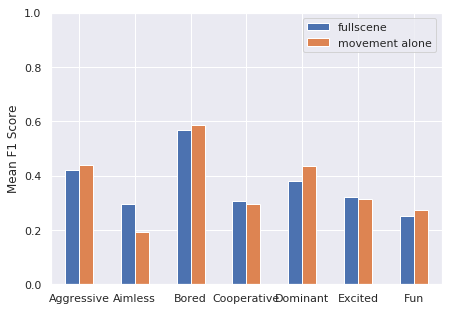

In [26]:
fs_mean = fs.iloc[[1]].T
ma_mean = ma.iloc[[1]].T

f1_mean = pd.concat([fs_mean['mean'], ma_mean['mean']], axis=1, keys=['fullscene', 'movement alone'])
f1_mean
ax = f1_mean.plot.bar(rot=0, figsize=(7,5)) #plot
ax.set_ylabel("Mean F1 Score")
ax.set_ylim(0,1)

In [27]:
fs_mean_chance = fschance.iloc[[1]].T
ma_mean_chance = machance.iloc[[1]].T
f1_mean_chance = pd.concat([fs_mean['mean'], fs_mean_chance['mean'], ma_mean['mean'], ma_mean_chance['mean']], axis=1, keys=['Fullscene', 'Fullscene Chance', 'Movement Alone', 'Movement Alone Chance'])

(f1_mean_chance).round(3).transpose()

,Aggressive,Aimless,Bored,Cooperative,Dominant,Excited,Fun
Fullscene,0.422,0.295,0.566,0.307,0.379,0.322,0.251
Fullscene Chance,0.181,0.172,0.115,0.176,0.199,0.171,0.108
Movement Alone,0.437,0.194,0.585,0.296,0.434,0.312,0.275
Movement Alone Chance,0.198,0.160,0.109,0.191,0.196,0.179,0.105


# 3.3 Factor Analysis

Exploratory Factor Analysis examining what latent constructs underlie particiants' responses in each condition.

The Python factor_analyzer module is a port of EFA from the R' psych package.

In [28]:
import factor_analyzer

rotation = 'promax'

nb_factors=3

efa_fullscene = factor_analyzer.FactorAnalyzer()
efa_fullscene.analyze(fullscene_ratings_df, nb_factors, rotation=rotation)
fullscene_loadings=efa_fullscene.loadings

efa_move = factor_analyzer.FactorAnalyzer()
efa_move.analyze(move_ratings_df, nb_factors, rotation=rotation)
move_loadings=efa_move.loadings

Comparing the loadings for the *fullscene* vs the *movement alone* data show that the first three factors are highly correlated. **This shows that, using factor analysis, we have uncovered latent constructs that are used by participants to describe the clips in both *fullscene* and *movement alone* conditions**.

In [29]:
# merge loadings into one dataframe, movement alone and fullscene side-by-side
loadings=pd.concat([fullscene_loadings, move_loadings], keys=["fullscene","movement alone"], axis=1)
loadings=loadings.swaplevel(0,1,1).sort_index(1)

from scipy.stats import pearsonr

print("Pearson correlation between factors 'fullscene' vs 'movement alone'")
for i in range(1, nb_factors+1):
    r, p=pearsonr(loadings["Factor%d" % i]["fullscene"].values, loadings["Factor%d" % i]["movement alone"].values)
    print("Factor %d: r=%f, p=%f" % (i,r,p)) 
    

show_heatmap(loadings[abs(loadings)>=0.3])

Pearson correlation between factors 'fullscene' vs 'movement alone'
Factor 1: r=0.937367, p=0.000000
Factor 2: r=0.835589, p=0.000000
Factor 3: r=0.809878, p=0.000001


In [30]:
efa_move.get_factor_variance() #variance explained by each construct for movement-alone data

,Factor1,Factor2,Factor3
SS Loadings,4.805225,3.677328,3.590071
Proportion Var,0.184816,0.141436,0.138080
Cumulative Var,0.184816,0.326252,0.464332


In [31]:
efa_fullscene.get_factor_variance() #variance explained by each construct for fullscene data

,Factor1,Factor2,Factor3
SS Loadings,3.961499,3.854104,3.598299
Proportion Var,0.152365,0.148235,0.138396
Cumulative Var,0.152365,0.300600,0.438996


### EFA embeddings

We can use the EFA space as a 'better' space to represent our clips, where the latent, composite constructs correspond to the main axis:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


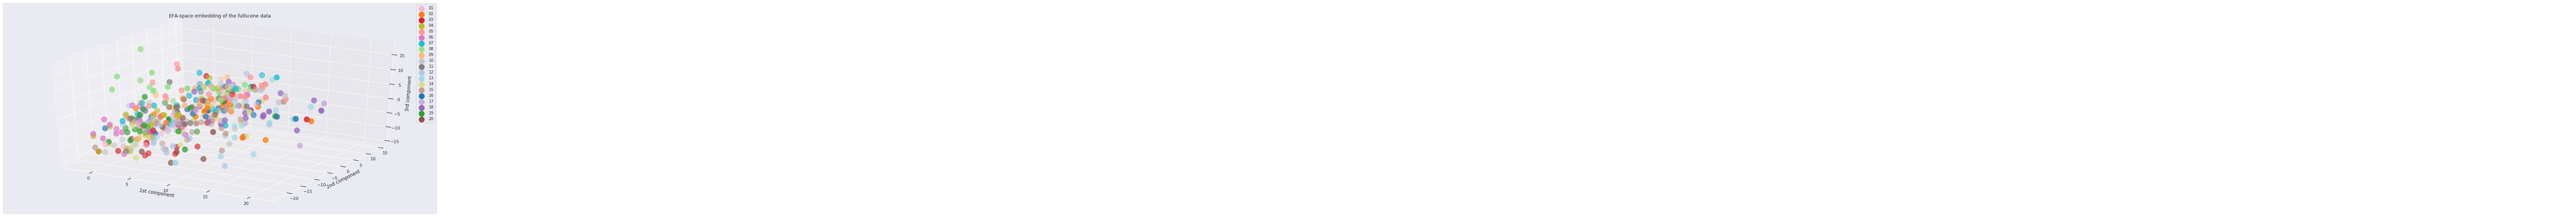

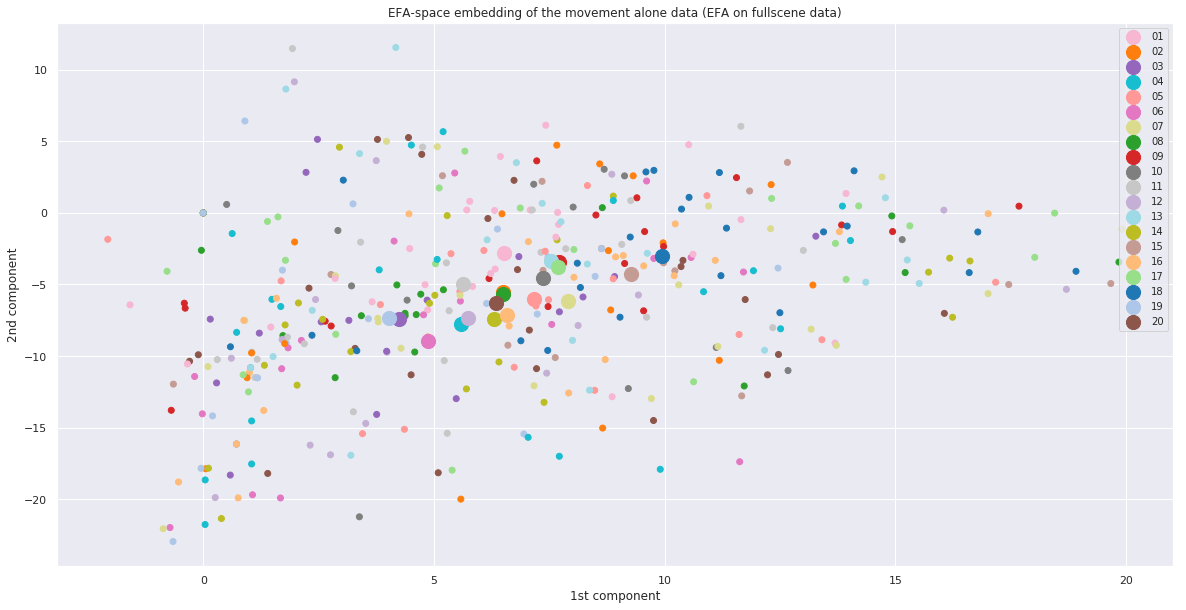

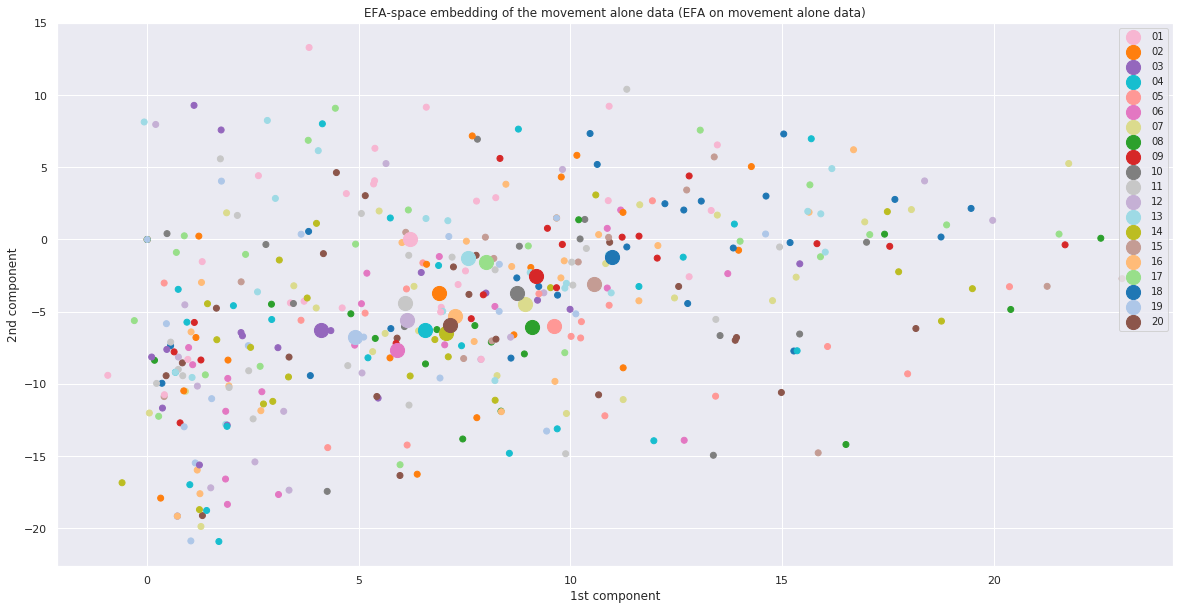

In [32]:
nb_of_factors=6
fullscene_efa = np.dot(fullscene,fullscene_loadings.values[:,:nb_of_factors])
fullscene_means_efa = np.dot(fullscene_means,fullscene_loadings.values[:,:nb_of_factors])
move_efa = np.dot(move,fullscene_loadings.values[:,:nb_of_factors])
move_means_efa = np.dot(move_means,fullscene_loadings.values[:,:nb_of_factors])

move_pure_efa = np.dot(move,move_loadings.values[:,:nb_of_factors])
move_pure_means_efa = np.dot(move_means,move_loadings.values[:,:nb_of_factors])


plot_embedding(fullscene_efa, fullscene_labels,fullscene_means_efa, fullscene_means.index, title="EFA-space embedding of the fullscene data", three_d=True)
plot_embedding(move_efa, move_labels,move_means_efa, move_means.index, title="EFA-space embedding of the movement alone data (EFA on fullscene data)", three_d=False)
plot_embedding(move_pure_efa, move_labels,move_pure_means_efa, move_means.index, title="EFA-space embedding of the movement alone data (EFA on movement alone data)", three_d=False)


Interestingly, even if the EFA factors are quite similar, the distances between the same clips in fullscene vs movement alone data are high in the EFA space:

In [33]:
distances_efa=pd.DataFrame(np.power(np.sum(np.power(move_means_efa - fullscene_means_efa, 2), axis=1), 0.5), index=move_means.index, columns=["distance_efa"])

print("Mean distance:\n%s" % distances_efa.mean(axis=0))
show_heatmap(distances_efa, cmap="summer_r")

Mean distance:
distance_efa    3.428116
dtype: float64


,distance_efa
clipId,
01,6.67003
02,1.64351
03,1.98804
04,4.6131
05,2.23726
06,4.56893
07,4.53029
08,1.74438
09,2.6114


## Social Expressivness of the EFA Embeddings

We can now attempt to cluster our 20 clips into 'groups' of similar clips (based on the latent constructs):

,cluster #
clipId,
02,0
17,0
16,0
09,0
04,1
06,1
05,2
08,2
01,3


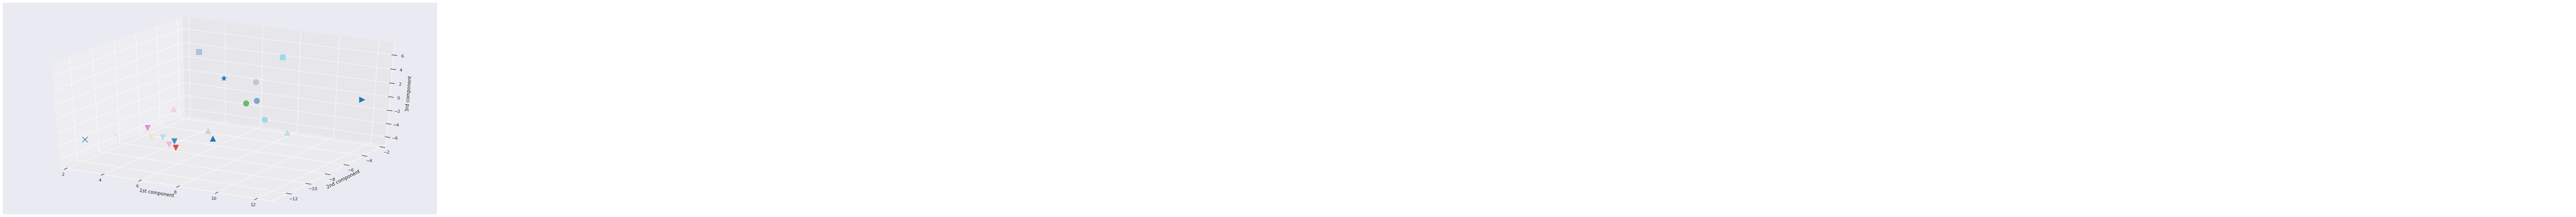

In [34]:
from sklearn.cluster import KMeans

# kMeans clustering after projecting our clips into the EFA-space
fullscene_clustering_data=fullscene_means_efa

nb_clusters=7 #arbitrary number of clusters

fullscene_kmeans_model = KMeans(n_clusters=nb_clusters, random_state=0).fit(fullscene_clustering_data)
fullscene_kmeans = fullscene_kmeans_model.predict(fullscene_clustering_data)

plot_embedding(fullscene_clustering_data,fullscene_means.index,clusters=fullscene_kmeans, three_d=True)

pd.DataFrame(fullscene_kmeans, index=fullscene_means.index, columns=["cluster #"]).sort_values(by="cluster #")

We should be able to infer the semantics of the first 3 EFA factors.

We can then try to predict in which cluster the clips would end up, using only the ratings from the movement alone videos:

In [35]:
move_means_efa.shape

(20, 3)

7 movement alone clips out of 20 (35.0%) are predicted to fall into the same cluster as their 'fullscene' counterpart.


,fullscene clusters,movement clusters,same,kripp alpha std,kripp alpha mean,Fullscene alpha,Movement-Alone alpha
clipId,,,,,,,
09,0,4,False,0.00293768,-0.0205479,-0.0184706,-0.0226251
12,3,5,False,0.00429852,-0.0129387,-0.0098992,-0.0159782
11,5,0,False,0.0178256,-0.0118542,-0.0244588,0.000750473
13,5,0,False,0.00295265,-0.0103238,-0.0124117,-0.00823601
20,3,5,False,0.00718987,-0.0100304,-0.0151144,-0.0049464
15,5,0,False,0.0184102,-0.00942557,0.0035924,-0.0224435
08,2,2,True,0.00214669,-0.00715573,-0.0056378,-0.00867367
01,3,0,False,0.000992248,-0.00649568,-0.00579405,-0.0071973
02,0,5,False,0.00928934,-0.00495295,0.00161561,-0.0115215


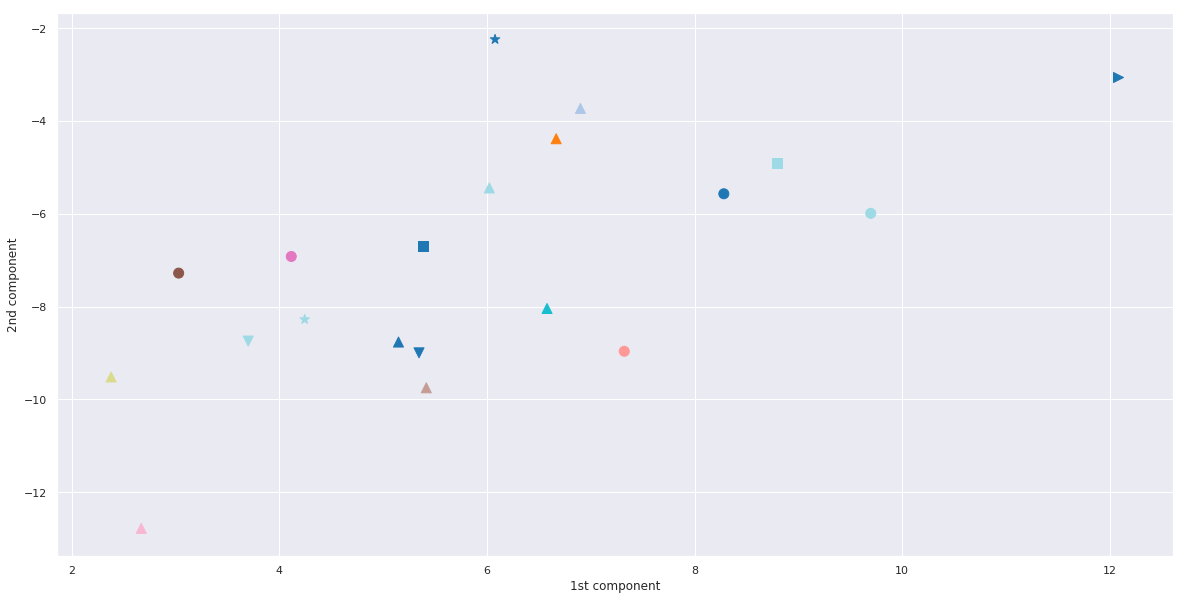

In [36]:
move_kmeans= fullscene_kmeans_model.predict(move_means_efa)

plot_embedding(fullscene_means_efa, move_means.index, clusters=move_kmeans, three_d=False)

diff=pd.DataFrame(fullscene_kmeans-move_kmeans,index=move_means.index)
print("%d movement alone clips out of %d (%.1f%%) are predicted to fall into the same cluster as their 'fullscene' counterpart." % (diff[diff==0].count(), move_kmeans.size, diff[diff==0].count() * 100. / move_kmeans.size))

clusters_kripp=pd.DataFrame([fullscene_kmeans, move_kmeans, fullscene_kmeans==move_kmeans,krippendorff_df[["Fullscene alpha", "Movement-Alone alpha"]].std(axis=1).astype(float), krippendorff_df[["Fullscene alpha", "Movement-Alone alpha"]].mean(axis=1).astype(float), krippendorff_df["Fullscene alpha"], krippendorff_df["Movement-Alone alpha"], ],index=["fullscene clusters", "movement clusters", "same", "kripp alpha std", "kripp alpha mean", "Fullscene alpha", "Movement-Alone alpha"],columns=move_means.index).T.sort_values(by="kripp alpha mean")
clusters_kripp

Is there a correlation between 'same clusters' and Krippendorf agreement (ie, consistency of ratings for a given clip)? No...

In [37]:
print("Mean Krippendorf, same cluster: %f" % clusters_kripp[clusters_kripp["same"] == True]["kripp alpha mean"].mean())
print("Std Krippendorf, same cluster: %f" % clusters_kripp[clusters_kripp["same"] == True]["kripp alpha mean"].std())
print("Mean Krippendorf, diff cluster: %f" % clusters_kripp[clusters_kripp["same"] == False]["kripp alpha mean"].mean())
print("Std Krippendorf, diff cluster: %f" % clusters_kripp[clusters_kripp["same"] == False]["kripp alpha mean"].std())

Mean Krippendorf, same cluster: 0.003149
Std Krippendorf, same cluster: 0.012011
Mean Krippendorf, diff cluster: -0.004571
Std Krippendorf, diff cluster: 0.010034


Adding the EFA projections to the original dataframes:

In [38]:
fullscene_df["efa1"] = pd.Series(fullscene_efa[:,0], index=fullscene_df.index)
fullscene_df["efa2"] = pd.Series(fullscene_efa[:,1], index=fullscene_df.index)
fullscene_df["efa3"] = pd.Series(fullscene_efa[:,2], index=fullscene_df.index)
move_df["efa1"] = pd.Series(move_efa[:,0], index=move_df.index)
move_df["efa2"] = pd.Series(move_efa[:,1], index=move_df.index)
move_df["efa3"] = pd.Series(move_efa[:,2], index=move_df.index)

We can then re-classify the clips, comparing the performance of the original 26-dimensional ratings to the 3-dimensional EFA-space projections (*still using a 300-fold cross-validation)*:

In [39]:
nb_iterations = 300

print("Fullscene, 80%/20%...")
results_fullscene,labels_f1_fullscene = run_classification(fullscene_df, crossvalidation_iterations=nb_iterations)
print("Fullscene, 80%/20%, EFA space...")
results_fullscene_efa,labels_f1_fullscene_efa = run_classification(fullscene_df, cols=["efa1", "efa2", "efa3"], crossvalidation_iterations=nb_iterations)
print("Fullscene, chance level...")
results_fullscene_chance,labels_f1_fullscene_chance = run_classification(fullscene_df, random_labels=True, crossvalidation_iterations=nb_iterations)
print("Fullscene, 80%/20%, sanity check [input cols=['age']]...")
results_fullscene_age,labels_f1_fullscene_age = run_classification(fullscene_df, cols=["age"], crossvalidation_iterations=nb_iterations)

print("Fullscene vs skeletons...")
results_fullscene_move,labels_f1_move = run_classification(fullscene_df, testing=move_df, crossvalidation_iterations=nb_iterations)
print("Fullscene vs skeletons, EFA space...")
results_fullscene_move_efa,labels_f1_move_efa = run_classification(fullscene_df, testing=move_df, cols=["efa1", "efa2", "efa3"], crossvalidation_iterations=nb_iterations)
print("Fullscene vs skeletons, chance level...")
results_fullscene_move_chance,labels_f1_move_chance = run_classification(fullscene_df, testing=move_df, random_labels=True, crossvalidation_iterations=nb_iterations)

collated_results = pd.DataFrame({"Full-scene, EFA space": results_fullscene_efa.mean(),
                                 "Full-scene": results_fullscene.mean(),
                                 "Full-scene, chance": results_fullscene_chance.mean(),
                                 #"Full-scene-80-20-sanity-check": results_fullscene_age.mean(),
                                 "Movement-alone, EFA space": results_fullscene_move_efa.mean(),
                                 "Movement-alone": results_fullscene_move.mean(),
                                 "Movement-alone, chance": results_fullscene_move_chance.mean()})
labels_f1 = pd.concat({"Full-scene, EFA space": labels_f1_fullscene_efa,
                       "Full-scene": labels_f1_fullscene,
                       "Full-scene, chance": labels_f1_fullscene_chance,
                       #"fullscene-80-20-sanity-check": labels_f1_fullscene_age,
                       "Movement-alone, EFA": labels_f1_move_efa,
                       "Movement-alone": labels_f1_move,
                       "Movement-alone, chance": labels_f1_move_chance}, axis=1)

Fullscene, 80%/20%...
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Fullscene, 80%/20%, EFA space...
Shape of training data: (316, 3)
Shape of testing data: (80, 3)
Fullscene, chance level...
Shape of training data: (316, 30)
Shape of testing data: (80, 30)
Fullscene, 80%/20%, sanity check [input cols=['age']]...
Shape of training data: (316, 1)
Shape of testing data: (80, 1)
Fullscene vs skeletons...
Shape of training data: (396, 30)
Shape of testing data: (400, 30)
Fullscene vs skeletons, EFA space...
Shape of training data: (396, 3)
Shape of testing data: (400, 3)
Fullscene vs skeletons, chance level...
Shape of training data: (396, 30)
Shape of testing data: (400, 30)


In [40]:
collated_results.round(3)

,"Full-scene, EFA space",Full-scene,"Full-scene, chance","Movement-alone, EFA space",Movement-alone,"Movement-alone, chance"
Accuracy,0.112,0.151,0.040,0.117,0.157,0.039
Precision,0.383,0.445,0.282,0.351,0.416,0.281
Recall,0.262,0.320,0.142,0.270,0.327,0.142
F1-measure,0.300,0.361,0.178,0.303,0.363,0.179


In [41]:
fullscene = labels_f1.loc[:, 'Full-scene']
fullsceneEFA = labels_f1.loc[:, 'Full-scene, EFA space']
fullsceneChance = labels_f1.loc[:, 'Full-scene, chance']
movement = labels_f1.loc[:, 'Movement-alone']
movementEFA = labels_f1.loc[:, 'Movement-alone, EFA']
movementChance = labels_f1.loc[:, 'Movement-alone, chance']

collated_labels = pd.DataFrame([fullsceneEFA.mean(axis=0)])
collated_labels = collated_labels.append([fullscene.mean(axis=0)],ignore_index=True)
collated_labels = collated_labels.append([fullsceneChance.mean(axis=0)],ignore_index=True)
collated_labels = collated_labels.append([movementEFA.mean(axis=0)],ignore_index=True)
collated_labels = collated_labels.append([movement.mean(axis=0)],ignore_index=True)
collated_labels = collated_labels.append([movementChance.mean(axis=0)],ignore_index=True)

collated_labels.rename(index={0:'Fullscene, EFA',1:'Fullscene',2:'Chance',
                              3:'Movement alone, EFA',4:'Movement alone',5:'Chance'}, inplace=True)
collated_labels

,Aggressive,Aimless,Bored,Cooperative,Dominant,Excited,Fun
"Fullscene, EFA",0.377553,0.161759,0.538918,0.293921,0.297218,0.259396,0.205547
Fullscene,0.421510,0.294529,0.566090,0.307417,0.378689,0.322202,0.250625
Chance,0.199542,0.168240,0.110304,0.180703,0.197071,0.169489,0.109944
"Movement alone, EFA",0.364964,0.240000,0.492308,0.246305,0.337079,0.273810,0.122449
Movement alone,0.437276,0.193548,0.584615,0.295918,0.433824,0.312139,0.274510
Chance,0.203540,0.156623,0.110064,0.186664,0.197370,0.177356,0.103484
